In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [ ]:
test.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


In [ ]:
train.shape


(700000, 26)

In [ ]:
test.shape

(300000, 25)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [ ]:
train.dtypes

,0
id,int64
age,int64
alcohol_consumption_per_week,int64
physical_activity_minutes_per_week,int64
diet_score,float64
sleep_hours_per_day,float64
screen_time_hours_per_day,float64
bmi,float64
waist_to_hip_ratio,float64
systolic_bp,int64


In [ ]:
#missingness of data
missingvalues = train.isnull().sum().sort_values(ascending=False)
missingvalues

,0
id,0
age,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,0
sleep_hours_per_day,0
screen_time_hours_per_day,0
bmi,0
waist_to_hip_ratio,0
systolic_bp,0


In [ ]:
#change data type for diagnosed diabetes
train['diagnosed_diabetes'] = train['diagnosed_diabetes'].astype('int')

In [ ]:
train.dtypes

,0
id,int64
age,int64
alcohol_consumption_per_week,int64
physical_activity_minutes_per_week,int64
diet_score,float64
sleep_hours_per_day,float64
screen_time_hours_per_day,float64
bmi,float64
waist_to_hip_ratio,float64
systolic_bp,int64


In [ ]:
categorical_cols = [
    "gender", "ethnicity", "education_level",
    "income_level", "smoking_status", "employment_status"
]

train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)
test  = pd.get_dummies(test, columns=categorical_cols, drop_first=True)

# Align columns
train, test = train.align(test, join='left', axis=1, fill_value=0)


In [ ]:
train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,smoking_status_Former,smoking_status_Never,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,False,False,True,False,False,False,False,False,False,False
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,False,False,False,False,True,False,True,False,False,False
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,False,False,True,False,False,False,True,True,False,False
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,False,False,True,False,False,False,False,False,False,False
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,False,False,False,False,True,False,True,True,False,False


In [ ]:
train.shape

(700000, 38)

In [ ]:
train.dtypes

,0
id,int64
age,int64
alcohol_consumption_per_week,int64
physical_activity_minutes_per_week,int64
diet_score,float64
sleep_hours_per_day,float64
screen_time_hours_per_day,float64
bmi,float64
waist_to_hip_ratio,float64
systolic_bp,int64


In [ ]:
TARGET = "diagnosed_diabetes"

# Make a copy for correlation
df_corr = train.copy()
# Compute correlation with target
corr_with_target = df_corr.corr()[TARGET].sort_values(ascending=False)

print("Correlation with target (high → more associated with diabetes):")
display(corr_with_target)


Correlation with target (high → more associated with diabetes):


,diagnosed_diabetes
diagnosed_diabetes,1.000000
family_history_diabetes,0.211064
age,0.161162
systolic_bp,0.107132
bmi,0.105580
ldl_cholesterol,0.102771
triglycerides,0.090635
cholesterol_total,0.088112
waist_to_hip_ratio,0.081050
diastolic_bp,0.036271


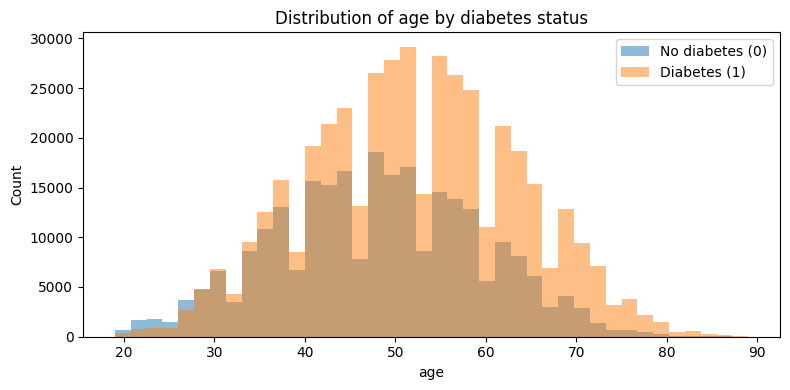

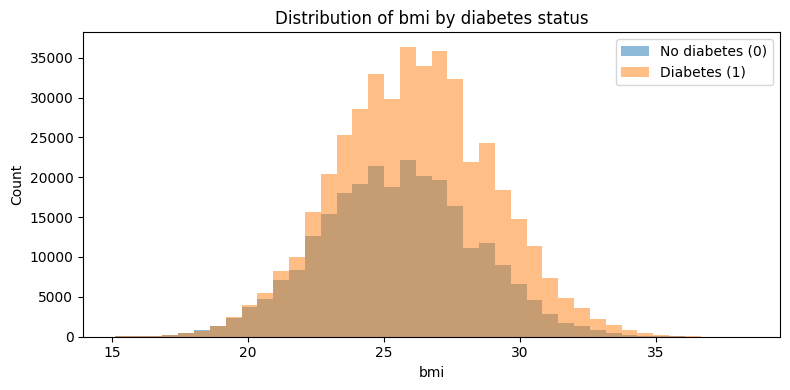

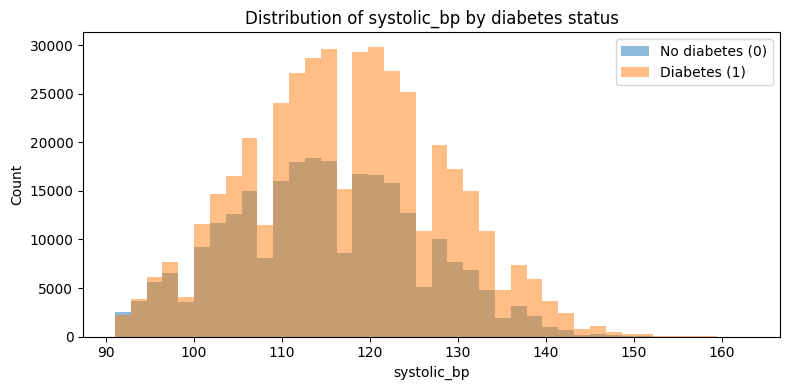

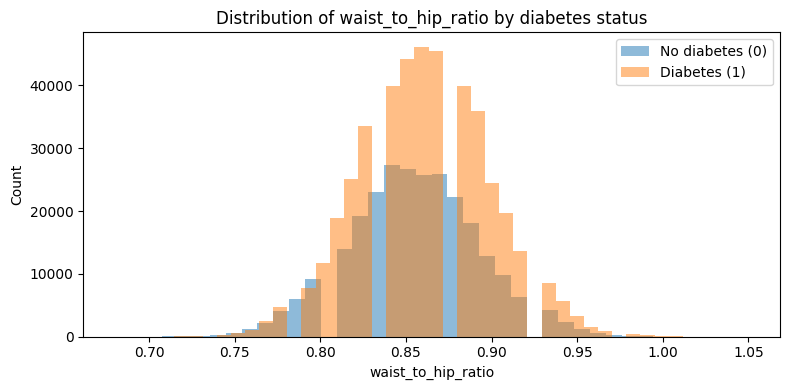

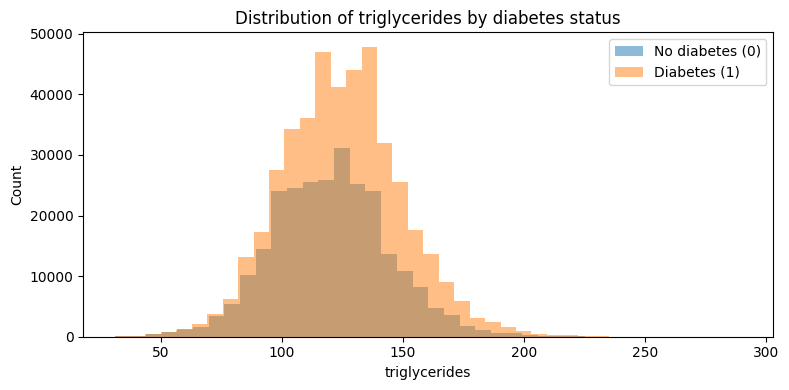

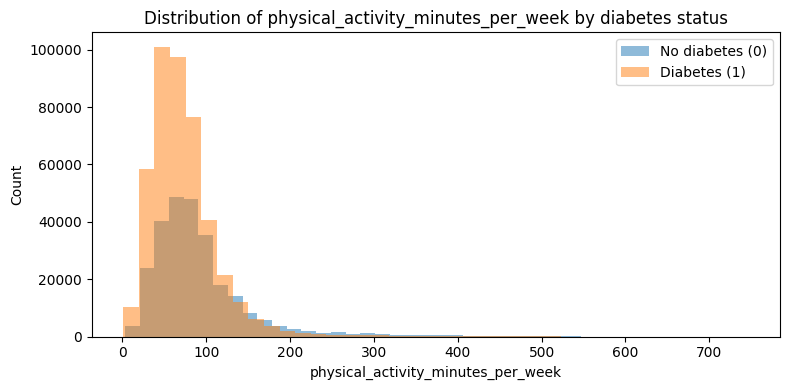

In [ ]:

important_feats = [
    "age",
    "bmi",
    "systolic_bp",
    "waist_to_hip_ratio",
    "triglycerides",
    "physical_activity_minutes_per_week"
]


important_feats = [f for f in important_feats if f in train.columns]

for feat in important_feats:
    plt.figure(figsize=(8, 4))

    # Split data
    diabetic = train[train[TARGET] == 1][feat].dropna()
    non_diabetic = train[train[TARGET] == 0][feat].dropna()

    # Plot histograms
    plt.hist(non_diabetic, bins=40, alpha=0.5, label="No diabetes (0)")
    plt.hist(diabetic,    bins=40, alpha=0.5, label="Diabetes (1)")

    plt.title(f"Distribution of {feat} by diabetes status")
    plt.xlabel(feat)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:

#  Clinical Feature Engineering for Diabetes

# Triglycerides
train["high_triglycerides"] = (train["triglycerides"] > 150).astype(int)
test["high_triglycerides"]  = (test["triglycerides"] > 150).astype(int)

# Waist-to-Hip Ratio
train["high_whr"] = (train["waist_to_hip_ratio"] >= 0.9).astype(int)
test["high_whr"]  = (test["waist_to_hip_ratio"] >= 0.9).astype(int)

# Blood Pressure
train["bp_stage1_or_higher"] = (train["systolic_bp"] >= 130).astype(int)
test["bp_stage1_or_higher"]  = (test["systolic_bp"] >= 130).astype(int)

# BMI categories
train["bmi_obese"] = (train["bmi"] >= 30).astype(int)
test["bmi_obese"]  = (test["bmi"] >= 30).astype(int)

train["bmi_overweight"] = (train["bmi"].between(25, 29.9)).astype(int)
test["bmi_overweight"]  = (test["bmi"].between(25, 29.9)).astype(int)

# Age risk factors
train["age_over_50"] = (train["age"] >= 50).astype(int)
test["age_over_50"]  = (test["age"] >= 50).astype(int)

train["age_over_60"] = (train["age"] >= 60).astype(int)
test["age_over_60"]  = (test["age"] >= 60).astype(int)

# Sedentary lifestyle
train["sedentary"] = (train["physical_activity_minutes_per_week"] < 30).astype(int)
test["sedentary"]  = (test["physical_activity_minutes_per_week"] < 30).astype(int)


| Feature                | Observation           | Effect                              |
| ---------------------- | --------------------- | ----------------------------------- |
| **Triglycerides**      | Diabetics much higher | Strong positive predictor           |
| **Waist-to-hip ratio** | Diabetics higher      | Strong predictor of central obesity |
| **Systolic BP**        | Diabetics higher      | Hypertension link                   |
| **BMI**                | Diabetics higher      | Obesity link                        |
| **Age**                | Diabetics older       | Age risk factor                     |
| **Physical activity**  | Diabetics lower       | Lifestyle risk                      |


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from xgboost import XGBClassifier



TARGET = "diagnosed_diabetes"
ID_COL = "id"

#  Encode categorical features
cat_cols = train.select_dtypes(include="object").columns.tolist()

if cat_cols:
    train = pd.get_dummies(train, columns=cat_cols, drop_first=True)
    test  = pd.get_dummies(test, columns=cat_cols, drop_first=True)

# Align columns for train/test
train, test = train.align(test, join="left", axis=1, fill_value=0)


# Build Feature Matrices
X = train.drop(columns=[ID_COL, TARGET])
y = train[TARGET]
X_test = test.drop(columns=[ID_COL])

# Convert booleans to integers
bool_cols = X.select_dtypes(include="bool").columns
X[bool_cols] = X[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)


# Train/Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


#  Class Imbalance Fix
neg, pos = (y == 0).sum(), (y == 1).sum()
scale_pos_weight = neg / pos
scale_pos_weight

np.float64(0.6043749011590462)

In [ ]:
TARGET = "diagnosed_diabetes"
ID_COL = "id"

if TARGET in test.columns:
    test = test.drop(columns=[TARGET])

# Build X and y from train
X = train.drop(columns=[ID_COL, TARGET])
y = train[TARGET]

# Make X_test have the EXACT same columns as X
feature_cols = X.columns.tolist()
X_test = test[feature_cols].copy()

print("Train feature shape:", X.shape)
print("Test feature shape:", X_test.shape)


Train feature shape: (700000, 44)
Test feature shape: (300000, 44)


In [ ]:
model = XGBClassifier(
    n_estimators=600,
    max_depth=5,
    learning_rate=0.03,
    subsample=0.85,
    colsample_bytree=0.7,
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
valid_proba = model.predict_proba(X_valid)[:, 1]
valid_pred = (valid_proba >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_valid, valid_proba))
print(classification_report(y_valid, valid_pred))
print(confusion_matrix(y_valid, valid_pred))


ROC-AUC: 0.7217006429136221
              precision    recall  f1-score   support

           0       0.53      0.70      0.60     52739
           1       0.77      0.62      0.69     87261

    accuracy                           0.65    140000
   macro avg       0.65      0.66      0.64    140000
weighted avg       0.68      0.65      0.66    140000

[[36917 15822]
 [33148 54113]]


In [ ]:
final_model = XGBClassifier(
    n_estimators=600,
    max_depth=5,
    learning_rate=0.03,
    subsample=0.85,
    colsample_bytree=0.7,
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    n_jobs=-1
)

final_model.fit(X, y)

test_proba = final_model.predict_proba(X_test)[:, 1]
test_pred = (test_proba >= 0.5).astype(int)


In [ ]:
import os

os.listdir()

submission = pd.DataFrame({
    ID_COL: test[ID_COL],
    TARGET: test_pred
})
submission.head()
submission_path = "/content/submission.csv"
submission.to_csv(submission_path, index=False)

print("Saved to:", submission_path)


Saved to: /content/submission.csv
